# Variance Analysis  
This notebook utilizes the output from the [Clustering with K-Means](https://github.com/sonyah-hawaii/time_series_regressive_modeling/blob/master/clustering.ipynb) notebook. It takes an in-depth look at the differences in variance within each cluster for three different components:  
- Variance and range of percent change in abatement over time
- Variance and range of total abatement over time
- Variance and range of total CO2 emissions over time
Using this information, the clusters are grouped together by similarity. The resulting groupings are used in the [Autoregression Modeling](https://github.com/sonyah-hawaii/time_series_regressive_modeling/blob/master/time_series.ipynb) notebook 

## Key takeaways:
- Globally, there is a steady upward trend of emissions, and a shaky upward trend of abatement. Emissions decrease everywhere during the global financial crisis, but some countries have sharper decreases than others. This difference likely can help distinguish between countries whose emissions are driven by personal consumption, or driven by manufacturing and basic energy usage needs.
- The US and China have very similar trends across all three metrics, with China's numbers being larger in scale. This aligns well with the reality that China's emissions trends are primarily driven by production and the US has long been the primary importer of Chinese goods. US consumption patterns and demand have historically had an impact in shaping the economies of emerging markets going through their own industrial eras.
- Norway remains an outlier because of what appears to be extreme variance. Further research reveals that the small percentage decrease in renewable energy production (from about 99% to 94%) has a significant real impact on metric tons emitted. It is likely that changes in personal consumption or something like a change in policy for product emissions or manufacturing standards (like MPG, or factory regulations).
- China, the second highest country for abatement and highest for emissions is the diriving force of global trends. Although we can take into account that China has the world's largest population, emissions are only more recently associated with domestic consumption and production. Any trends that exist pre-2008-2009 are reflective of changing global consumption patterns and demands.

## Review of Cohorts Developed for Modeling

### Groups:
#### [Cluster 1](#cluster_1)  
**Minimal Progress, greatest ability to improve quickly due to steady emissions trends**  
(Algeria, Argentina, Australia, Belgium, Chile, France, Indonesia, Italy, Kazakhstan, Kuwait, Malaysia, Mexico, Netherlands, New Zealand, Nigeria, Poland, Portugal, Romania, Saudi Arabia, South Africa, Spain, Sweden, Thailand, Turkey, Ukraine, United Arab Emirates, United Kingdom, Uzbekistan)  
_This cluster contains the most countries that are primarily in the lowest range of abatement, and remains quite steady through time. In addition, their range of emissions is significantly lower than other countries._ 

|Metric|Minimum|Maximum|Mean|
|---|---|---|---|
|Scaled change in abatement|-11.43|13.87|0.467|
|Change in abatement (metric tons CO2)|331.36|5954.47|2533.70|
|emissions|7|618|204.36|

#### [Cluster 2](#cluster_2)  
**High, but decreasing success due to increased emissions**
(Norway)  
_Norway has such a high range of variance, and surpasses any other country for renewable energy production that its variance is greatly affected by the sheer scale of production. This means that while the overall percentage of renewable energy production decreases from around 99% to 94%, it is a huge change in terms of metric tons of CO2._  

|Metric|Minimum|Maximum|Mean|
|---|---|---|---|
|Scaled change in abatement|-2431.12|2315.45|-128.96|
|Change in abatement (metric tons CO2)|190.07|1199.32|491.5|
|Change in emissions (metric tons CO2)|27|40|35.17|

#### Clusters [0](#cluster_0), [3](#cluster_3), and [4](#cluster_4)
**Progress held back by large increases in emissions**  
- Clusters 0, 3, and 4 (United States, China, and Brazil)  
_These countries have slightly different trends, but fall within a similar range (-4 to 4). Additionally, the United States and Brazil have similar trends for total emissions. The US is a bit of an odd-man-out because of the sheer volume of emissions. As the country with the highest emissions in the world it is difficult to increase abatement due to the scale and permanence of consumption patterns and conventional production._

                                                            United States

|Metric|Minimum|Maximum|Mean|
|---|---|---|---|
|Scaled change in abatement|-46.56|57.76|3.29|
|Change in abatement (metric tons CO2)|0.0|79.3|13.78|
|Change in emissions (metric tons CO2)|4811|5783|5381.75|

                                                           China

|Metric|Minimum|Maximum|Mean|
|---|---|---|---|
|Scaled change in abatement|-24.12|233.66|48.5|
|Change in abatement (metric tons CO2)|293.42|645.96|440.80|
|Change in emissions (metric tons CO2)|2201|8776|4606.08|  

                                                           Brazil

|Metric|Minimum|Maximum|Mean|
|---|---|---|---|
|Scaled change in abatement|-133.7|107.58|-6.49|
|Change in abatement (metric tons CO2)|217.81|368.79|300.35|
|Change in emissions (metric tons CO2)|191|451|296|   

#### [Cluster 5](#cluster_5) 
**Steadiest track record of increased with emissions matched with increased abatement**
- Cluster 5 (Canada, Colombia, Germany, India, Japan)
_Of these countries, the abatement trends are similar with a general increase, but India is an outlier for emissions growth, with a turn towards a steeper slope beginning in the early 2000's. Colombia is an outlier here because of their incredibly small emissions but high success with abatement._  

|Metric|Minimum|Maximum|Mean|
|---|---|---|---|
|Scaled change in abatement|-22.72|31.78|3.68|
|Change in abatement (metric tons CO2)|16.53|192.43|65.53|
|Change in emissions (metric tons CO2)|48|1815|701.22| 

- consolidate this information into a presentation format
- final model to predict next 5 years (goal)

Variance analysis:
- build a table
- look at variance within clusters

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter("ignore")

In [2]:
abatement = pd.read_csv('./Data/abatement_calculations.csv')
emissions = pd.read_csv('./Data/clusters_emissions.csv')
centers = pd.read_csv('./Data/cluster_centers.csv')
clusters = pd.read_csv('./Data/clusters_abatement.csv')

In [3]:
abatement.set_index('country', inplace=True)
emissions.set_index('Country', inplace=True)
centers.set_index('Unnamed: 0', inplace=True)
clusters.set_index('country', inplace=True)

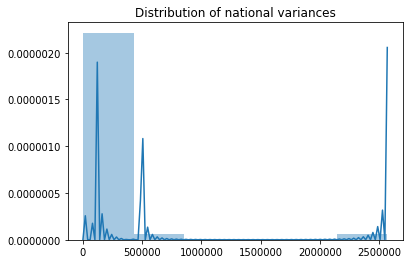

In [4]:
ntl_variances = abatement.T.var()
annual_variances = abatement.var()

sns.distplot(ntl_variances, bins=6);
plt.title('Distribution of national variances');

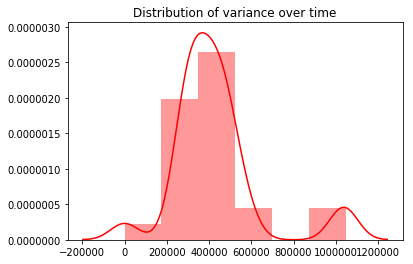

In [9]:
sns.distplot(annual_variances, bins=6, color='r');
plt.title('Distribution of variance over time');

In [6]:
abatement.shape, emissions.shape, clusters.shape

((38, 26), (38, 28), (37, 25))

In [7]:
#dropping years that are not in clusters
abatement_1 = abatement.drop('1990', axis=1)
abatement_1 = emissions.drop(['1990','2015','2016'], axis=1)

In [136]:
#Code used to build markdown tables above
datasets = ['clusters', 'abatement', 'emissions']
for k in [0,1,2,3,4,5]:
    print(k)
    for i in datasets:
        print(f'|{eval(i)[eval(i).label==k].iloc[:, 0:24].min().min().astype(float).round(2)}|{eval(i)[eval(i).label==k].iloc[:, 0:24].max().max().astype(float).round(2)}|{eval(i)[eval(i).label==k].iloc[:, 0:24].mean().mean()}|')

0
|-46.57|57.76|3.2983173517357347|
|217.81|368.79|300.351540428584|
|4811.0|5783.0|5381.75|
1
|-11.43|13.87|0.466893459035169|
|0.0|79.3|13.785894025051737|
|7.0|618.0|204.35714285714286|
2
|-2431.13|2315.45|-128.9592026742624|
|331.36|5954.47|2533.7028312889174|
|27.0|40.0|35.166666666666664|
3
|-24.12|233.66|48.49948748317865|
|190.07|1199.32|491.49786283816655|
|2201.0|8776.0|4606.083333333333|
4
|-133.7|107.58|-6.648267433810588|
|293.42|645.96|440.80136501241776|
|191.0|451.0|296.0|
5
|-22.72|31.78|3.681221128069921|
|16.53|384.92|110.93402073352512|
|48.0|1815.0|701.2166666666667|


### Cluster 0
#### - describe each group:
    - why are they in there?
    - who is the outlier?
    - who is the median?
- cluster represents abatement progress over time

To do:
- try to articulate descriptions for each cluster
    - were there certain times when there was a spike or drop
    - take each cluster and plot out abatement for all countries within that cluster
- look more into the attributes/commonalities within these disparaging groups
<a id='cluster_0'></a>

Countries in cluster 0: 
['United States']


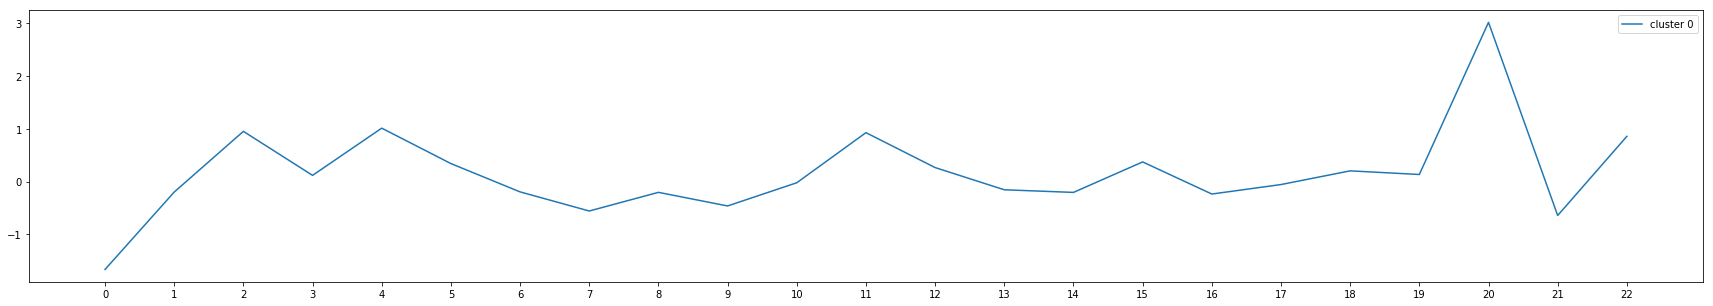

In [137]:
plt.figure(figsize=(30,5))
plt.plot(centers.iloc[0, 0:23], label='cluster 0');
plt.legend();
print(f'Countries in cluster 0: \n{[n for n in abatement[abatement.label==0].index]}')

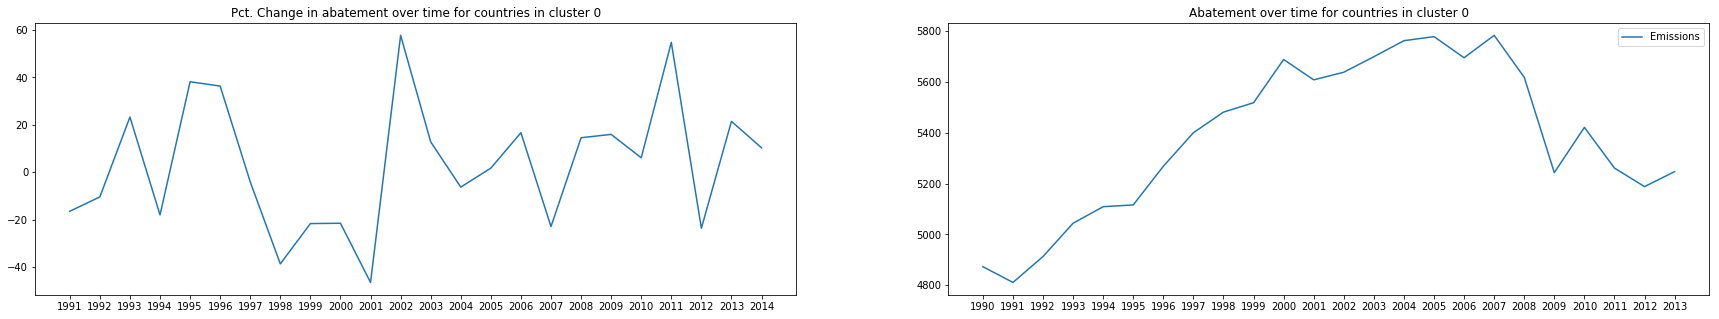

In [245]:
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.plot(clusters[clusters['label']==0].iloc[:, 0:24].T);
plt.title('Pct. Change in abatement over time for countries in cluster 0');

plt.subplot(1,2,2)
#plt.plot(abatement[abatement.label==0].iloc[:, 0:24].T, label='Abatement');
plt.plot(emissions[emissions.label==0].iloc[:, 0:24].T, label='Emissions');
plt.legend()
plt.title('Abatement over time for countries in cluster 0');

In [198]:
abatement[abatement['label']==0].T.var().values

array([4899.56433853])

### Cluster 1
<a id='cluster_1'></a>
- describe each group:
    - why are they in there?
    - who is the outlier?
    - who is the median?
- cluster represents abatement progress over time

To do:
- try to articulate descriptions for each cluster
    - were there certain times when there was a spike or drop
    - take each cluster and plot out abatement for all countries within that cluster
- look more into the attributes/commonalities within these disparaging groups

#### So we have a lot of countries contained in this cluster (28 of 37). Note in the graph below that these countries have a relatively steady trend with a standardized percent change between +-0.3

Countries in cluster 1: 
['Algeria', 'Argentina', 'Australia', 'Belgium', 'Chile', 'France', 'Indonesia', 'Italy', 'Kazakhstan', 'Kuwait', 'Malaysia', 'Mexico', 'Netherlands', 'New Zealand', 'Nigeria', 'Poland', 'Portugal', 'Romania', 'Saudi Arabia', 'South Africa', 'Spain', 'Sweden', 'Thailand', 'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uzbekistan']


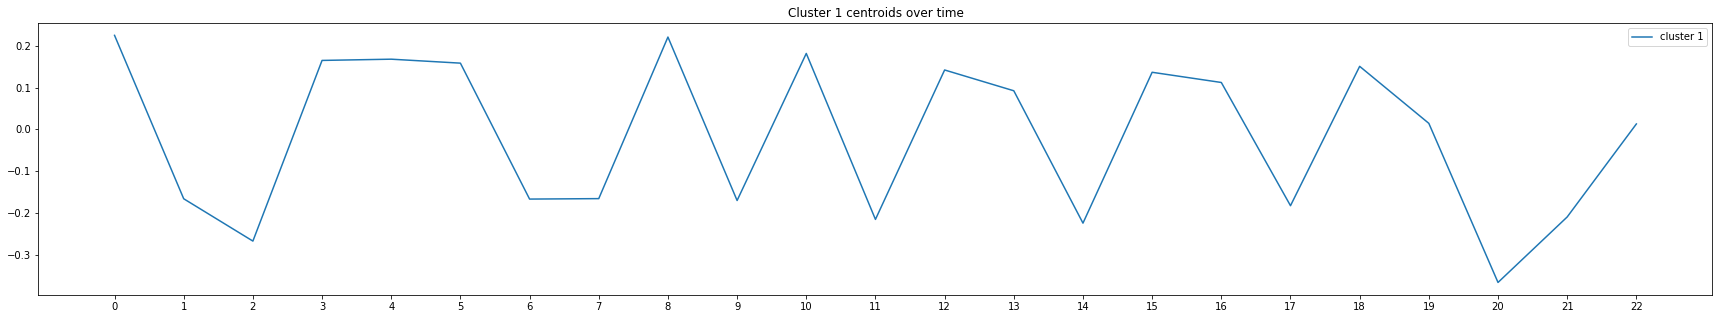

In [11]:
plt.figure(figsize=(30,5))
plt.plot(centers.iloc[1, 0:23], label='cluster 1');
plt.legend();
plt.title('Cluster 1 centroids over time')
print(f'Countries in cluster 1: \n{[n for n in clusters[clusters.label==1].index]}')

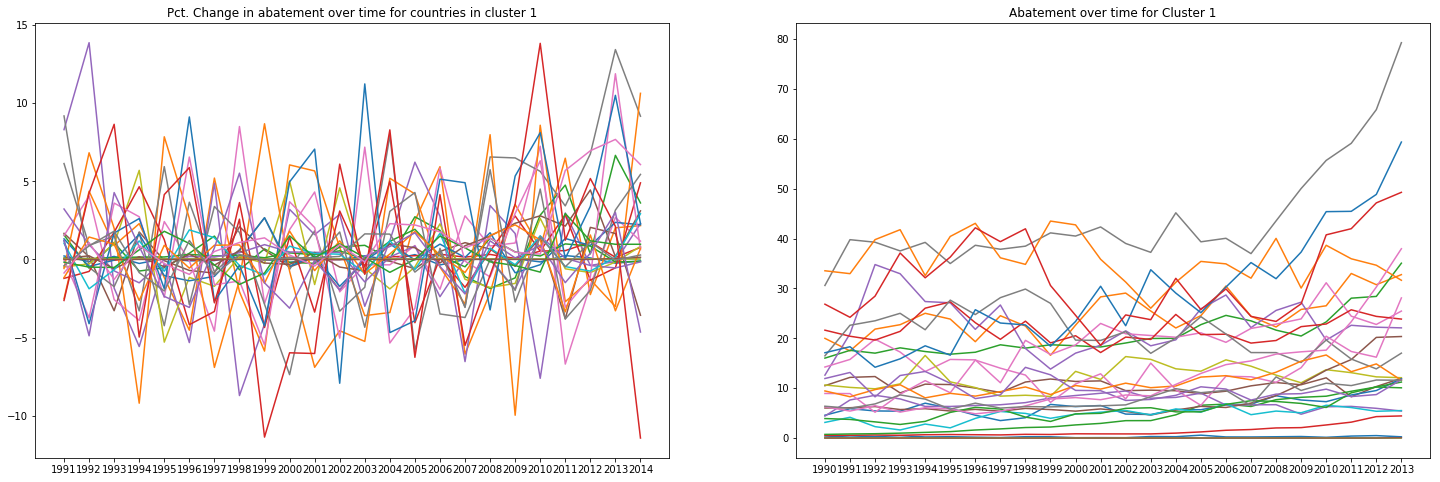

In [32]:
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
plt.plot(clusters[clusters.label==1].iloc[:, 0:24].T);
plt.title('Pct. Change in abatement over time for countries in cluster 1');

plt.subplot(1,2,2)
plt.plot(abatement[abatement.label==1].iloc[:, 0:24].T);

plt.title('Abatement over time for Cluster 1');

Text(0.5,1,'Emissions over time for Cluster 1')

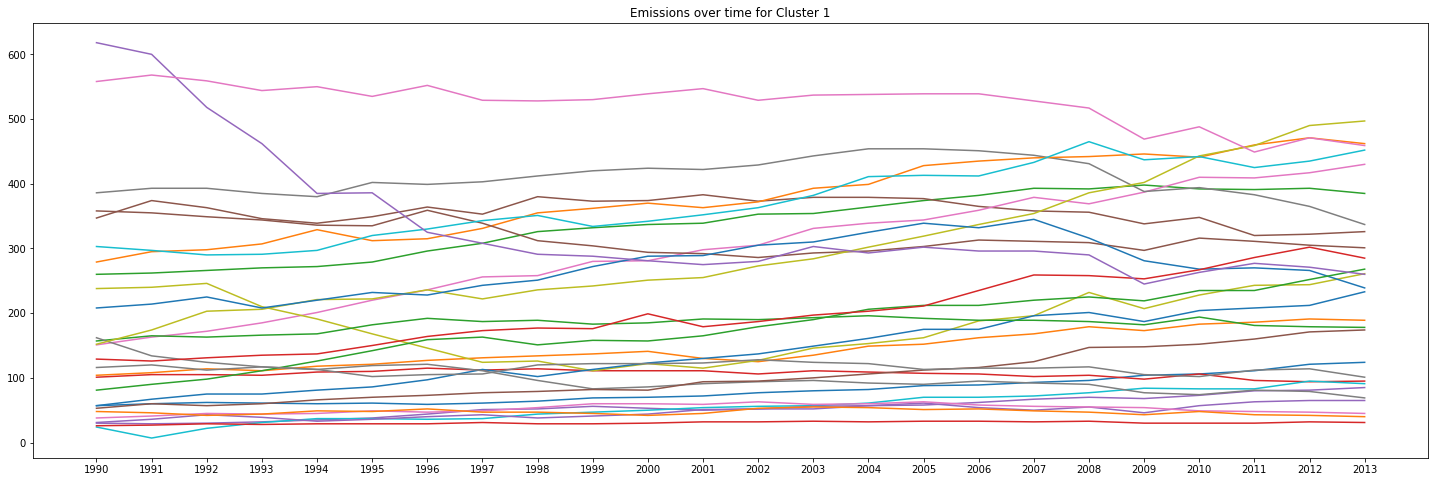

In [16]:
plt.figure(figsize=(25,8))
plt.plot(emissions[emissions.label==1].iloc[:, 0:24].T);
plt.title('Emissions over time for Cluster 1')

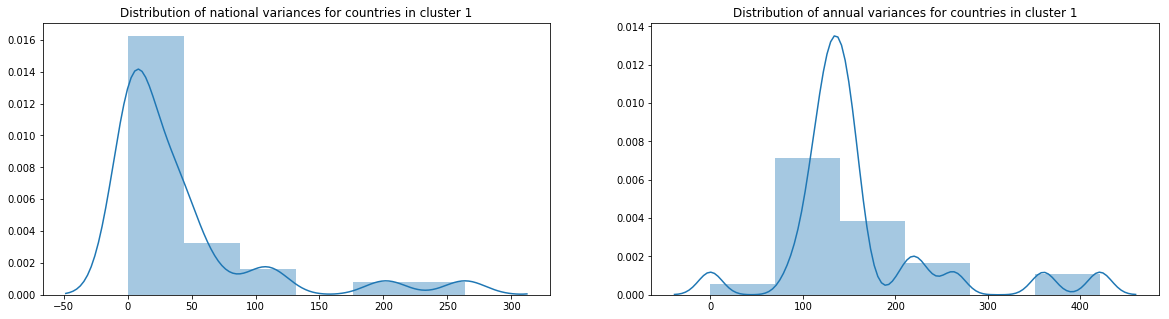

In [203]:
ntl_variances = abatement[abatement['label']==1].T.var()
annual_variances = abatement[abatement['label']==1].var()
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(ntl_variances, bins=6);
plt.title('Distribution of national variances for countries in cluster 1');
plt.subplot(1,2,2)
sns.distplot(annual_variances, bins=6);
plt.title('Distribution of annual variances for countries in cluster 1');

##### _Although the map to the look appears hectic, it's really telling us countries in this group have had a relatively small amount of change over time, with their maximum and minimum changes between 15 and -10%. Additionally, their patterns of abatement look similar in shape and trend.

## Cluster 2
<a id='cluster_2'></a>
### - describe each group:
    - why are they in there?
    - who is the outlier?
    - who is the median?
- cluster represents abatement progress over time

To do:
- try to articulate descriptions for each cluster
    - were there certain times when there was a spike or drop
    - take each cluster and plot out abatement for all countries within that cluster
- look more into the attributes/commonalities within these disparaging groups

Countries in cluster 2: 
['Norway']


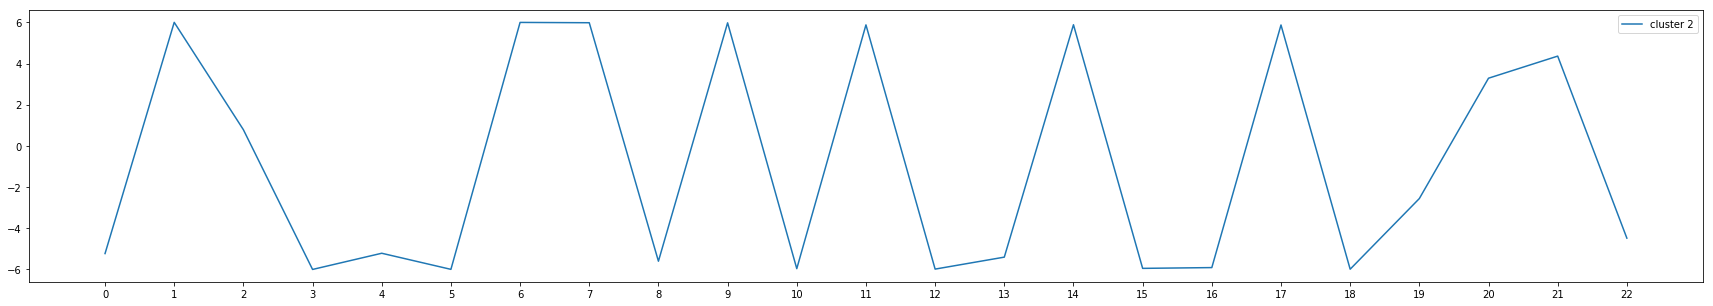

In [142]:
plt.figure(figsize=(30,5))
plt.plot(centers.iloc[2, 0:23], label='cluster 2');
plt.legend();
print(f'Countries in cluster 2: \n{[n for n in clusters[clusters.label==2].index]}')

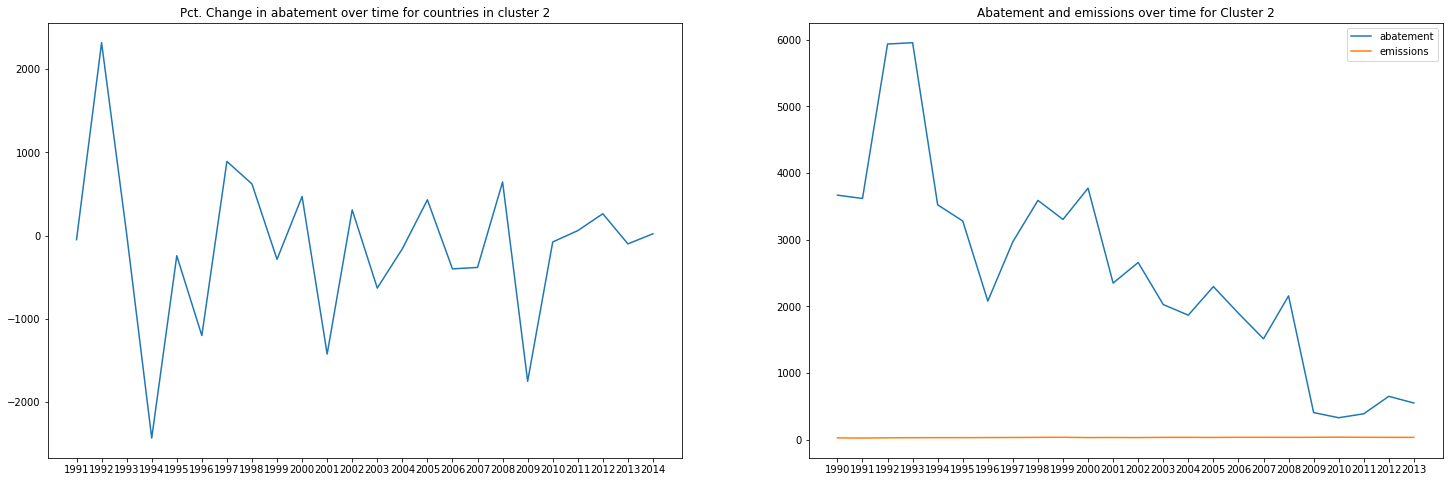

In [20]:
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
plt.plot(clusters[clusters.label==2].iloc[:, 0:24].T);
plt.title('Pct. Change in abatement over time for countries in cluster 2');

plt.subplot(1,2,2)
plt.plot(abatement[abatement.label==2].iloc[:, 0:24].T, label='abatement');
plt.plot(emissions[emissions.label==2].iloc[:, 0:24].T, label='emissions');
plt.legend()
plt.title('Abatement and emissions over time for Cluster 2');

## Cluster 3
<a id='cluster_3'></a>
### - describe each group:
    - why are they in there?
    - who is the outlier?
    - who is the median?
- cluster represents abatement progress over time

To do:
- try to articulate descriptions for each cluster
    - were there certain times when there was a spike or drop
    - take each cluster and plot out abatement for all countries within that cluster
- look more into the attributes/commonalities within these disparaging groups

Countries in cluster 3: 
['China']


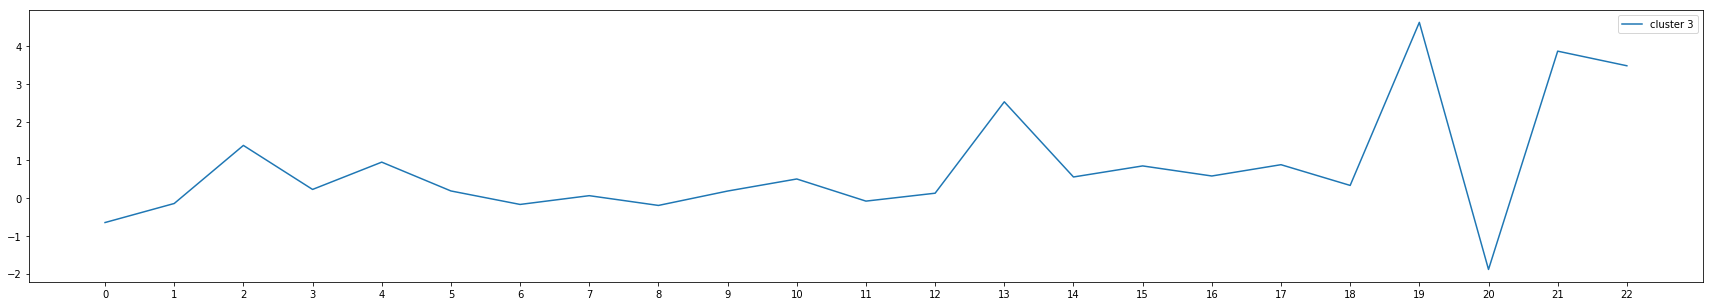

In [205]:
plt.figure(figsize=(30,5))
plt.plot(centers.iloc[3, 0:23], label='cluster 3');
plt.legend();
print(f'Countries in cluster 3: \n{[n for n in clusters[clusters.label==3].index]}')

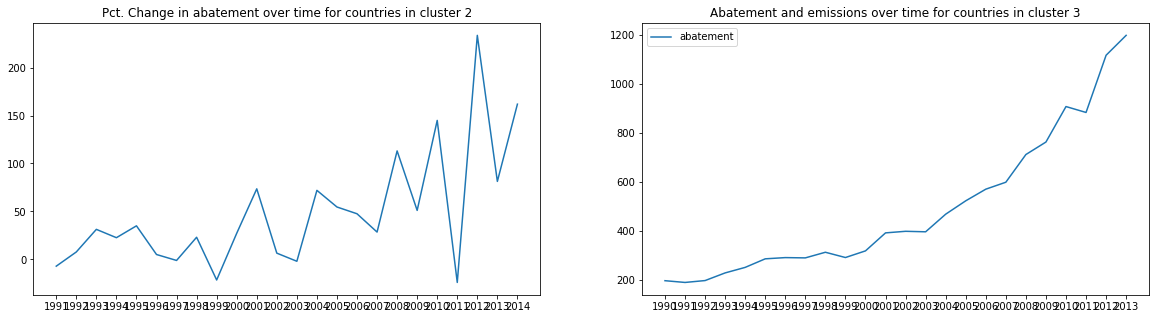

In [225]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(clusters[clusters.label==3].iloc[:, 0:24].T);
plt.title('Pct. Change in abatement over time for countries in cluster 2');

plt.subplot(1,2,2)
plt.plot(abatement[abatement.label==3].iloc[:, 0:24].T,label='abatement');
#plt.plot(emissions[emissions.label==3].iloc[:, 0:24].T,label='emissions');
plt.legend()
plt.title('Abatement and emissions over time for countries in cluster 3');

## Cluster 4
<a id='cluster_4'></a>
### - describe each group:
    - why are they in there?
    - who is the outlier?
    - who is the median?
- cluster represents abatement progress over time

To do:
- try to articulate descriptions for each cluster
    - were there certain times when there was a spike or drop
    - take each cluster and plot out abatement for all countries within that cluster
- look more into the attributes/commonalities within these disparaging groups

Countries in cluster 4: 
['Brazil']


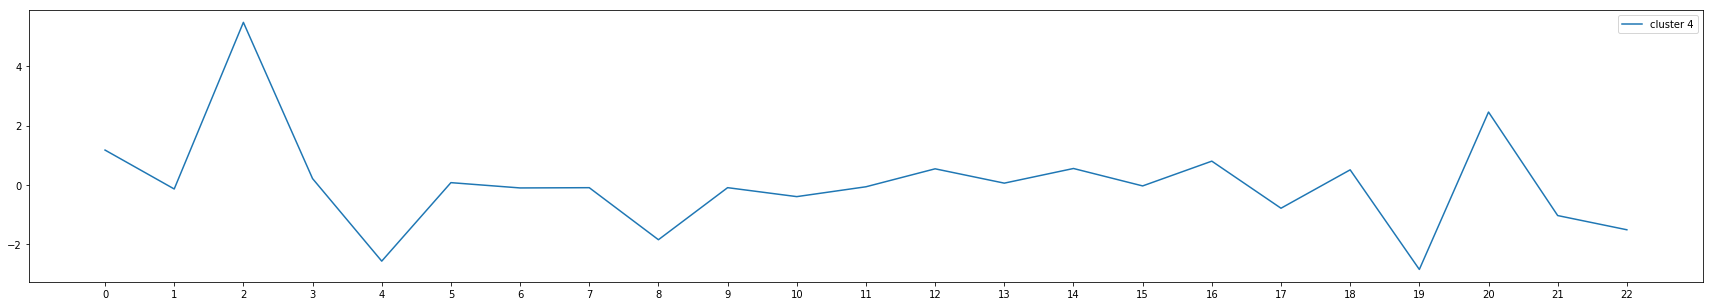

In [210]:
plt.figure(figsize=(30,5))
plt.plot(centers.iloc[4, 0:23], label='cluster 4');
plt.legend();
print(f'Countries in cluster 4: \n{[n for n in clusters[clusters.label==4].index]}')

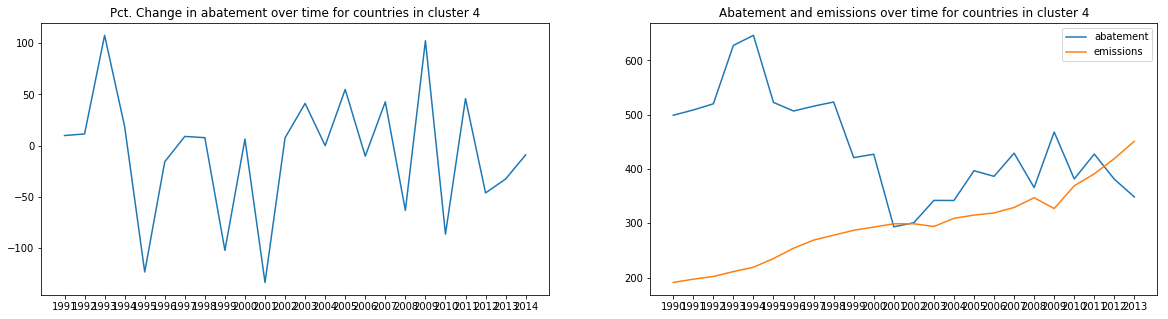

In [227]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(clusters[clusters.label==4].iloc[:, 0:24].T);
plt.title('Pct. Change in abatement over time for countries in cluster 4');

plt.subplot(1,2,2)
plt.plot(abatement[abatement.label==4].iloc[:, 0:24].T, label='abatement');
plt.plot(emissions[emissions.label==4].iloc[:, 0:24].T, label='emissions');
plt.legend()
plt.title('Abatement and emissions over time for countries in cluster 4');

## Cluster 5
<a id='cluster_5'></a>
### - describe each group:
    - why are they in there?
    - who is the outlier?
    - who is the median?
- cluster represents abatement progress over time

To do:
- try to articulate descriptions for each cluster
    - were there certain times when there was a spike or drop
    - take each cluster and plot out abatement for all countries within that cluster
- look more into the attributes/commonalities within these disparaging groups

Countries in cluster 5: 
['Canada', 'Colombia', 'Germany', 'India', 'Japan']


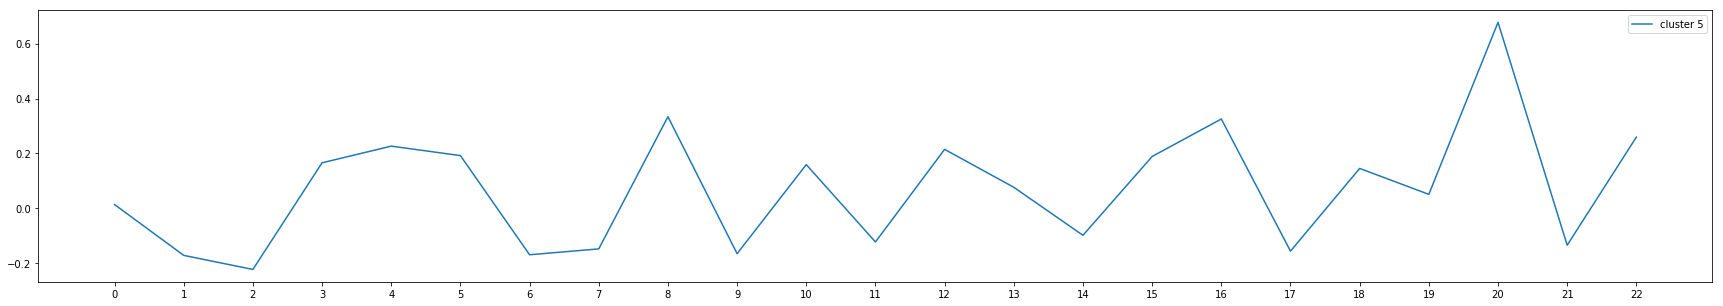

In [216]:
plt.figure(figsize=(30,5))
plt.plot(centers.iloc[5, 0:23], label='cluster 5');
plt.legend();
print(f'Countries in cluster 5: \n{[n for n in clusters[clusters.label==5].index]}')

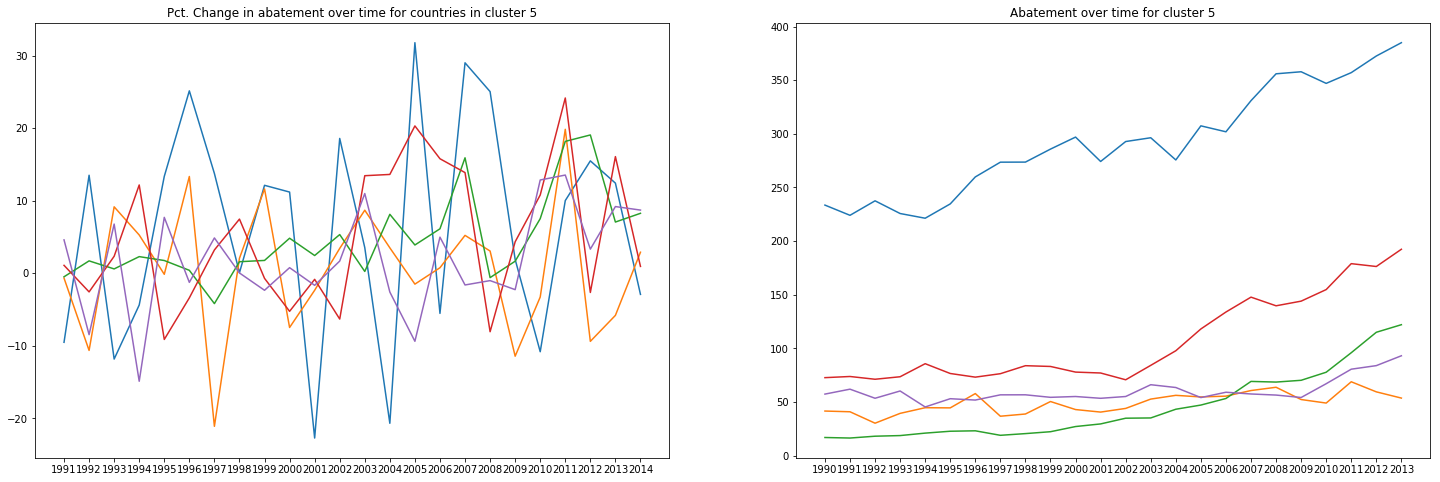

In [34]:
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
plt.plot(clusters[clusters.label==5].iloc[:, 0:24].T);
plt.title('Pct. Change in abatement over time for countries in cluster 5');

plt.subplot(1,2,2)
plt.plot(abatement[abatement.label==5].iloc[:, 0:24].T);
plt.title('Abatement over time for cluster 5');

Text(0.5,1,'Emissions over time for Cluster 5')

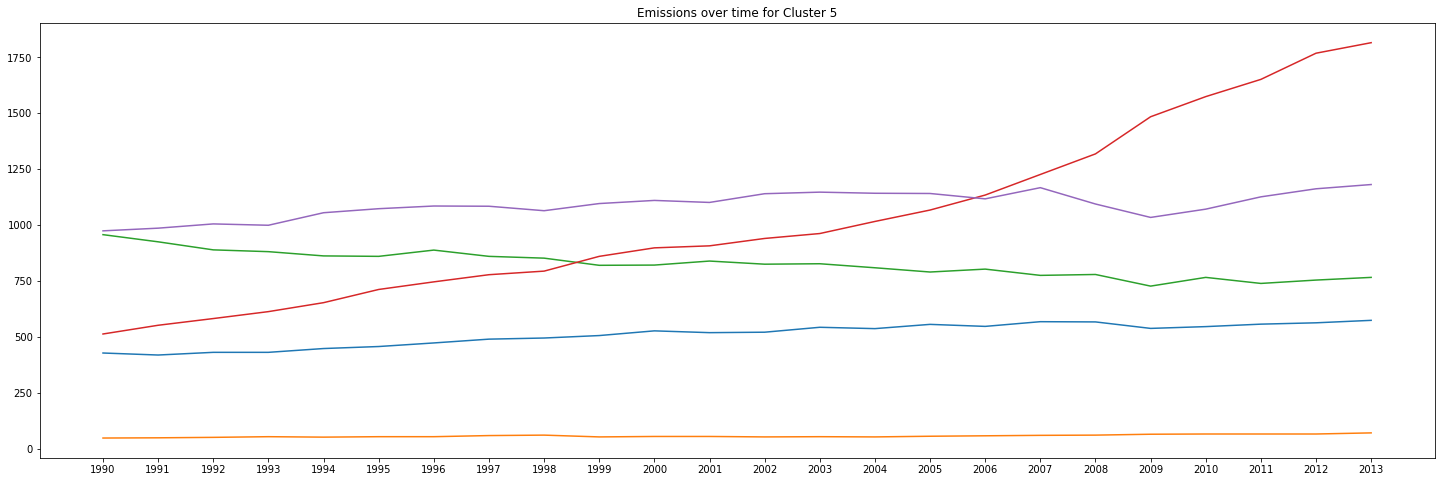

In [28]:
plt.figure(figsize=(25,8))
plt.plot(emissions[emissions.label==5].iloc[:, 0:24].T);
plt.title('Emissions over time for Cluster 5')

In [243]:
emissions[emissions.label==5]

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,label
Country,,,,,,,,,,,,,,,,,,,,,
Canada,428,419,431,431,448,457,473,490,495,506,...,567,538,546,557,563,574,584,570,564,5.0
Colombia,48,49,51,54,52,54,54,59,61,53,...,61,65,66,66,66,71,73,74,65,5.0
Germany,957,925,889,881,862,860,888,860,852,820,...,779,727,766,739,754,766,734,737,744,5.0
India,513,552,582,613,653,712,746,778,794,860,...,1318,1484,1574,1651,1768,1815,1980,2011,2088,5.0
Japan,974,986,1005,999,1055,1073,1085,1084,1064,1096,...,1094,1034,1071,1126,1162,1181,1136,1105,1096,5.0


In [242]:
abatement[abatement.label==5].iloc[:, 0:24]

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,,,,,,,,,,,,
Canada,233.588425,224.063758,237.567369,225.734206,221.349320,234.694313,259.831004,273.578820,273.650891,285.767548,...,275.652310,307.427314,301.889839,330.891202,355.923481,357.827061,347.005520,357.015972,372.500906,384.917912
Colombia,41.675929,41.001943,30.360337,39.510639,44.780534,44.629902,57.961270,36.857466,38.918655,50.542974,...,56.315807,54.811538,55.567468,60.783330,63.841295,52.402655,49.118687,68.954400,59.563306,53.752462
Germany,17.022550,16.530274,18.231157,18.823381,21.110855,22.862344,23.260726,19.071056,20.656506,22.418257,...,43.363301,47.253218,53.375448,69.283580,68.674612,70.329392,77.848720,96.020877,115.077705,122.130576
India,72.791344,73.876386,71.300875,73.634987,85.799426,76.669613,73.270981,76.476214,83.936285,83.226607,...,97.865701,118.166884,133.945148,147.815092,139.750970,144.082324,154.861653,179.014727,176.361766,192.434093
Japan,57.466355,62.061085,53.592710,60.367679,45.476420,53.175300,51.915741,56.778133,56.812508,54.459756,...,63.614771,54.231680,59.203028,57.582812,56.564218,54.299673,67.148805,80.679022,83.999150,93.185937


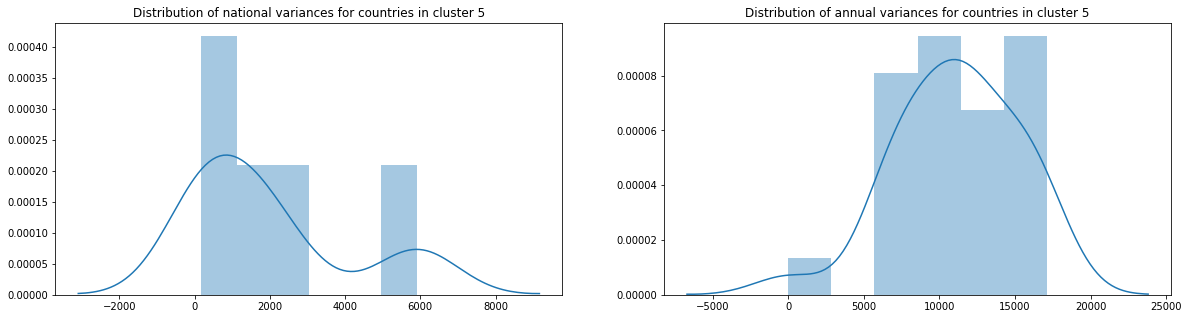

In [218]:
ntl_variances = abatement[abatement['label']==5].T.var()
annual_variances = abatement[abatement['label']==5].var()
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(ntl_variances, bins=6);
plt.title('Distribution of national variances for countries in cluster 5');
plt.subplot(1,2,2)
sns.distplot(annual_variances, bins=6);
plt.title('Distribution of annual variances for countries in cluster 5');

#### Random visualizations for presentation and further analysis

In [253]:
top_10 = abatement.sort_values('2014', ascending=False)[0:10]
top_10_emissions = emissions.sort_values('2014', ascending=False)[0:10]

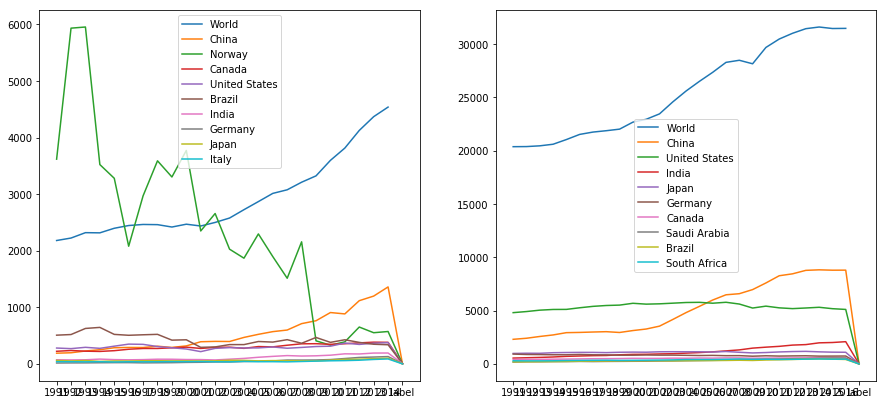

In [254]:
plt.figure(figsize=(15, 15));
plt.subplot(2,2,1)
for i in range(len(top_10)):
    plt.plot(top_10.iloc[i, 1:], label=top_10.index[i]);
plt.legend();

plt.subplot(2,2,2)

for i in range(len(top_10_emissions)):
    plt.plot(top_10_emissions.iloc[i, 1:], label=top_10_emissions.index[i]);
plt.legend();

In [251]:
top_10_nn = top_10.drop(labels='Norway')

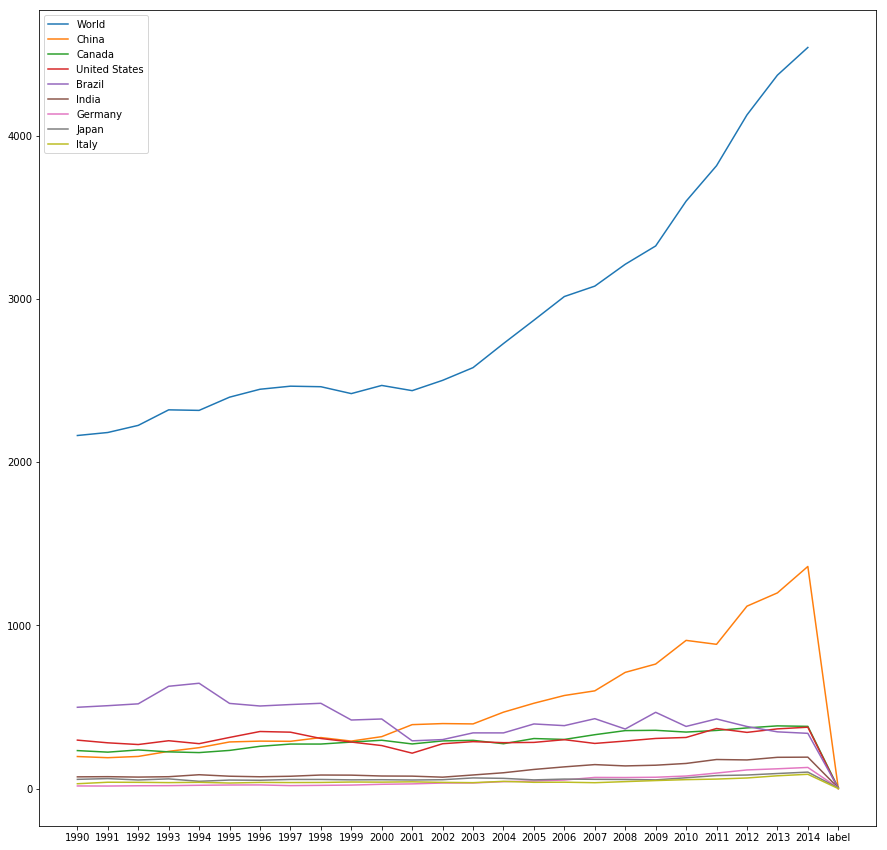

In [252]:
plt.figure(figsize=(15, 15));
for i in range(len(top_10_nn)):
    plt.plot(top_10_nn.iloc[i, :], label=top_10_nn.index[i]);
plt.legend();

In [23]:
abatement_historical = abatement

In [41]:
cohort_3_pct_change = clusters.loc[(clusters.label==0)
                                         |(clusters.label==3)
                                        |(clusters.label==4)]

cohort_3_abatement = abatement_historical.loc[(abatement_historical.label==0)
                                         |(abatement_historical.label==3)
                                        |(abatement_historical.label==4)]
cohort_3_emissions = emissions.loc[(emissions.label==0)
                                         |(emissions.label==3)
                                        |(emissions.label==4)]

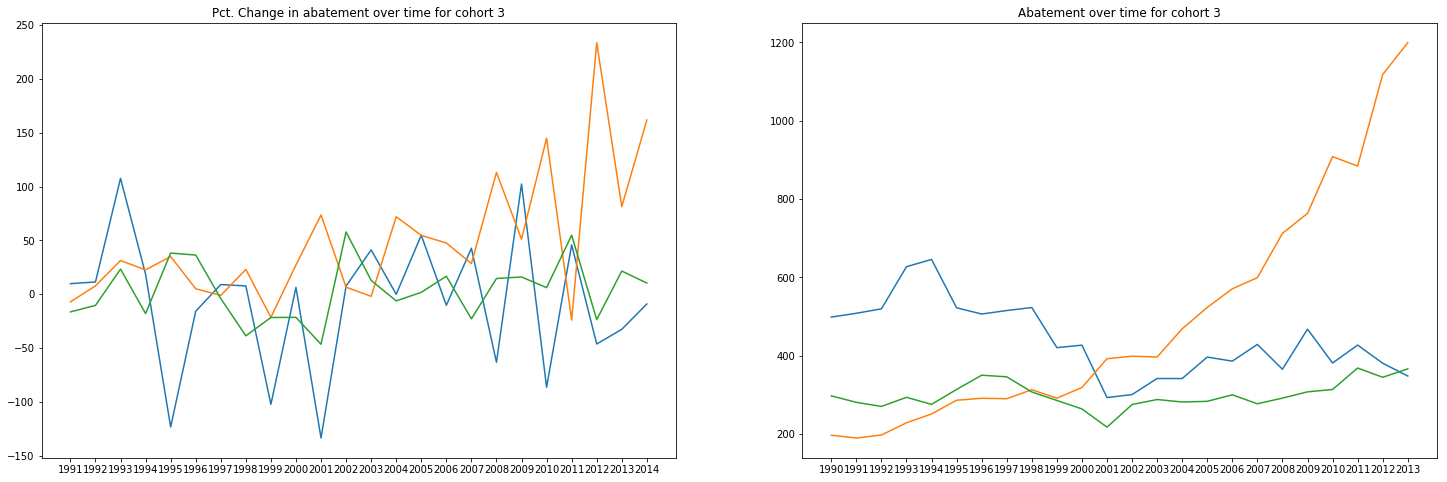

In [42]:
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
plt.plot(cohort_3_pct_change.iloc[:, 0:24].T);
plt.title('Pct. Change in abatement over time for cohort 3');

plt.subplot(1,2,2)
plt.plot(cohort_3_abatement.iloc[:, 0:24].T);
plt.title('Abatement over time for cohort 3');

Text(0.5,1,'Emissions over time for Cluster 5')

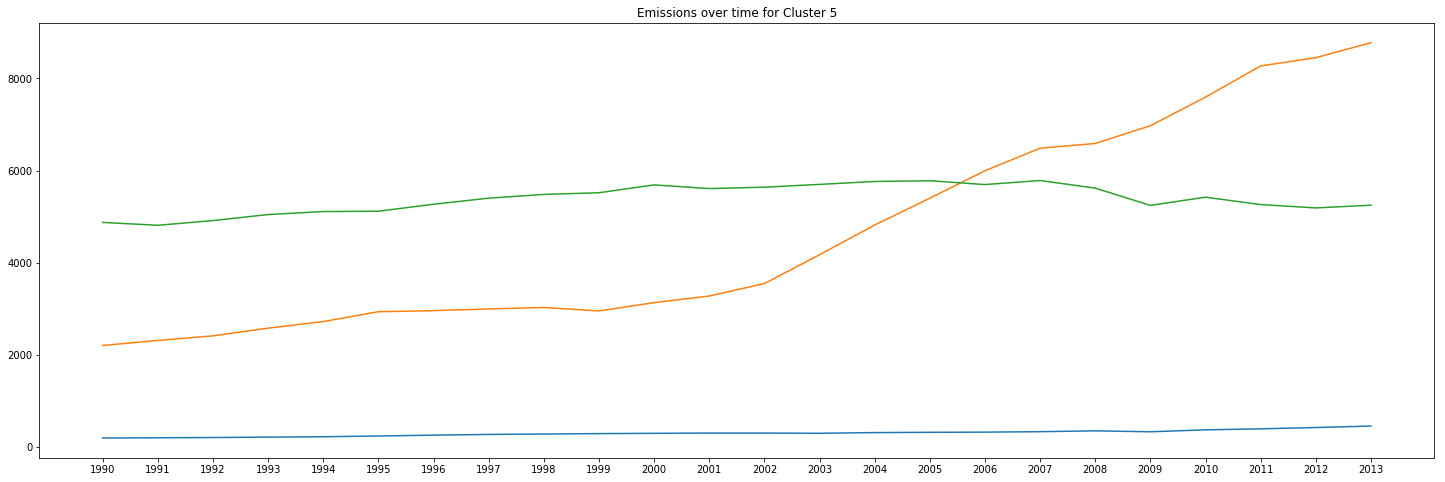

In [38]:
plt.figure(figsize=(25,8))
plt.plot(cohort_3_emissions.iloc[:, 0:24].T);
plt.title('Emissions over time for Cluster 5')

the difficult part will be paring down the information: focus on how to set up the presentation to focus on the _results_

break down by different charts: would there be certain data interesting within that chart?

- line chart: different cohorts created from each clusers
    - abatement countries over time (or mean abatment over time)
    - subplots, separate out by cluster

- histogram
    - distribution of variance for  all countries

- model comparison
    - list best model for each cohort
    - thoughts as to why
        - if there is a specific thought, a visualization could complement that
        